In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('retail_clean.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df['date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month'] = df['month'].astype('category')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,week,month,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,49,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,49,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,49,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,49,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,49,12,2009


In [8]:
df = df.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('Quantity', 'sum')).sort_values(by = 'date').reset_index()

C:\Users\thanh\AppData\Local\Temp\ipykernel_19712\4111309283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('Quantity', 'sum')).sort_values(by = 'date').reset_index()


In [9]:
df.head()

,week,month,year,date,total_quantity
0,49,12,2009,2009-12-01,138612
1,50,12,2009,2009-12-07,109644
2,51,12,2009,2009-12-14,125772
3,52,12,2009,2009-12-21,24680
4,1,1,2010,2010-01-04,95950


In [10]:
df = df.dropna(axis = 0, subset = 'date')

In [11]:
import numpy as np

In [12]:
df['trend'] = np.arange(1,len(df)+1,1)

In [13]:
df.head()

,week,month,year,date,total_quantity,trend
0,49,12,2009,2009-12-01,138612,1
1,50,12,2009,2009-12-07,109644,2
2,51,12,2009,2009-12-14,125772,3
3,52,12,2009,2009-12-21,24680,4
4,1,1,2010,2010-01-04,95950,5


In [14]:
df.tail()

,week,month,year,date,total_quantity,trend
116,46,11,2011,2011-11-14,156756,117
117,47,11,2011,2011-11-21,154179,118
118,48,11,2011,2011-11-28,78241,119
119,48,12,2011,2011-12-01,61655,120
120,49,12,2011,2011-12-05,225123,121


In [15]:
X = df[['trend', 'month']]

In [16]:
X = pd.get_dummies(data = X)
X

,trend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,False,False,False,False,False,False,False,False,False,False,False,True
1,2,False,False,False,False,False,False,False,False,False,False,False,True
2,3,False,False,False,False,False,False,False,False,False,False,False,True
3,4,False,False,False,False,False,False,False,False,False,False,False,True
4,5,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,False,False,False,False,False,False,False,False,False,False,True,False
117,118,False,False,False,False,False,False,False,False,False,False,True,False
118,119,False,False,False,False,False,False,False,False,False,False,True,False
119,120,False,False,False,False,False,False,False,False,False,False,False,True


In [17]:
names = X.columns
names

Index(['trend', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = np.array(X)
X

array([[1, False, False, ..., False, False, True],
       [2, False, False, ..., False, False, True],
       [3, False, False, ..., False, False, True],
       ...,
       [119, False, False, ..., False, True, False],
       [120, False, False, ..., False, False, True],
       [121, False, False, ..., False, False, True]], dtype=object)

In [20]:
y = np.array(df['total_quantity'])
y

array([138612, 109644, 125772,  24680,  95950,  66861, 128040,  79277,
        62355,  47991, 173356,  88169,  99106,  72381, 150427, 131206,
        48981,  16911,  81776,  81325,  77985,  92607,   6296,  90396,
       104455,  83128, 100685,  56473, 119717,  79410,  59917,  74363,
        30118,  71145,  80832,  79908,  62635,   9702,  72473, 172881,
       105113,  81344,  11038,  70760,  71856,  99271, 135203, 190716,
        41839, 158435, 168496, 120628, 107099, 156059, 154106, 147677,
       134148,  61084,  83231, 100859,  96188,  30785,  70148,  76829,
       131231,  57897,  12417,  52620,  47456,  76725,  79855,   8387,
        57249,  63560,  83202,  72865,  70747,  23925,  63987,  84188,
        74047,  45222,   3814,  73587, 101609, 103838,  79532,  10568,
        43892,  92047,  99089,  70051,  57935,  10524,  79487,  75102,
       101869, 100390,  99033,  91482,  98182,  93744,  15749,  54088,
       103322, 115456, 163415, 107373,   8322, 164837, 111426, 147103,
      

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
model.intercept_

93710.83648175989

In [24]:
model.coef_

array([  -113.0786593 ,  -9450.76876892, -18017.41043209,  -3649.89681309,
       -23859.60351657, -18251.54696942, -11580.17759389, -17103.18429737,
        -8681.39674002,  26029.14162532,  23792.13453611,  49253.86754801,
        11518.84142191])

In [25]:
dict1 = list(zip(names, model.coef_))
dict1

[('trend', -113.07865930370268),
 ('month_1', -9450.768768915468),
 ('month_2', -18017.41043208752),
 ('month_3', -3649.8968130932753),
 ('month_4', -23859.60351657476),
 ('month_5', -18251.546969417846),
 ('month_6', -11580.177593885881),
 ('month_7', -17103.184297367377),
 ('month_8', -8681.396740017202),
 ('month_9', 26029.141625321532),
 ('month_10', 23792.134536114794),
 ('month_11', 49253.867548010385),
 ('month_12', 11518.841421912652)]

In [26]:
df['prediction'] = model.predict(X)

In [27]:
df['squared_error'] = (df['total_quantity'] - df['prediction'])**2
df

,week,month,year,date,total_quantity,trend,prediction,squared_error
0,49,12,2009,2009-12-01,138612,1,105116.599244,1.121942e+09
1,50,12,2009,2009-12-07,109644,2,105003.520585,2.153405e+07
2,51,12,2009,2009-12-14,125772,3,104890.441926,4.360395e+08
3,52,12,2009,2009-12-21,24680,4,104777.363266,6.415588e+09
4,1,1,2010,2010-01-04,95950,5,83694.674416,1.501930e+08
...,...,...,...,...,...,...,...,...
116,46,11,2011,2011-11-14,156756,117,129734.500891,7.301614e+08
117,47,11,2011,2011-11-21,154179,118,129621.422232,6.030746e+08
118,48,11,2011,2011-11-28,78241,119,129508.343573,2.628341e+09
119,48,12,2011,2011-12-01,61655,120,91660.238787,9.003144e+08


C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='total_quantity'>

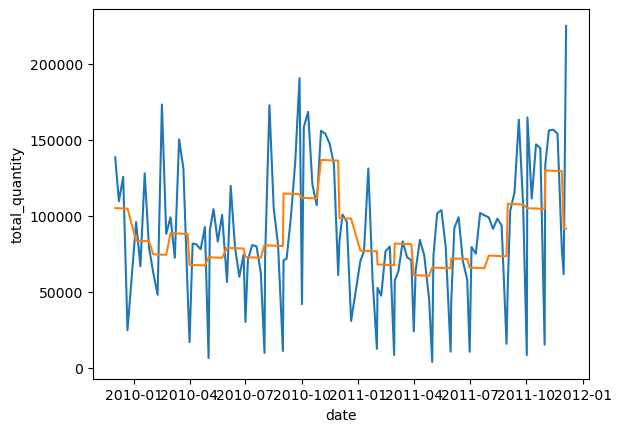

In [28]:
import seaborn as sns

sns.lineplot(data = df, x = df['date'], y = df['total_quantity'])
sns.lineplot(data = df, x = df['date'], y = df['prediction'])

In [29]:
import math
RMSE = math.sqrt(df['squared_error'].mean())
RMSE

39335.64105642789

In [30]:
max_date = df['date'].max()
max_date

Timestamp('2011-12-05 00:00:00')

In [31]:
dates = pd.DataFrame({'date': pd.date_range(start = '2011-12-12', end = '2012-08-05', freq = 'W')})

In [32]:
df = pd.concat([df, dates], axis = 0).reset_index()
df

,index,week,month,year,date,total_quantity,trend,prediction,squared_error
0,0,49,12,2009.0,2009-12-01,138612.0,1.0,105116.599244,1.121942e+09
1,1,50,12,2009.0,2009-12-07,109644.0,2.0,105003.520585,2.153405e+07
2,2,51,12,2009.0,2009-12-14,125772.0,3.0,104890.441926,4.360395e+08
3,3,52,12,2009.0,2009-12-21,24680.0,4.0,104777.363266,6.415588e+09
4,4,1,1,2010.0,2010-01-04,95950.0,5.0,83694.674416,1.501930e+08
...,...,...,...,...,...,...,...,...,...
150,29,<NA>,NaN,NaN,2012-07-08,NaN,NaN,NaN,NaN
151,30,<NA>,NaN,NaN,2012-07-15,NaN,NaN,NaN,NaN
152,31,<NA>,NaN,NaN,2012-07-22,NaN,NaN,NaN,NaN
153,32,<NA>,NaN,NaN,2012-07-29,NaN,NaN,NaN,NaN


In [33]:
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month'] = df['month'].astype('category')
df

,index,week,month,year,date,total_quantity,trend,prediction,squared_error
0,0,49,12,2009,2009-12-01,138612.0,1.0,105116.599244,1.121942e+09
1,1,50,12,2009,2009-12-07,109644.0,2.0,105003.520585,2.153405e+07
2,2,51,12,2009,2009-12-14,125772.0,3.0,104890.441926,4.360395e+08
3,3,52,12,2009,2009-12-21,24680.0,4.0,104777.363266,6.415588e+09
4,4,1,1,2010,2010-01-04,95950.0,5.0,83694.674416,1.501930e+08
...,...,...,...,...,...,...,...,...,...
150,29,27,7,2012,2012-07-08,NaN,NaN,NaN,NaN
151,30,28,7,2012,2012-07-15,NaN,NaN,NaN,NaN
152,31,29,7,2012,2012-07-22,NaN,NaN,NaN,NaN
153,32,30,7,2012,2012-07-29,NaN,NaN,NaN,NaN


In [34]:
df = df.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('total_quantity', 'sum')).sort_values(by = 'date').reset_index()

C:\Users\thanh\AppData\Local\Temp\ipykernel_19712\2757030087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('total_quantity', 'sum')).sort_values(by = 'date').reset_index()


In [35]:
df = df.dropna(axis = 0, subset = 'date')

In [36]:
df['trend'] = np.arange(1,len(df)+1,1)

In [37]:
X = df[['trend', 'month']]
X = pd.get_dummies(data = X).values

In [38]:
df['prediction'] = model.predict(X)

C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='total_quantity'>

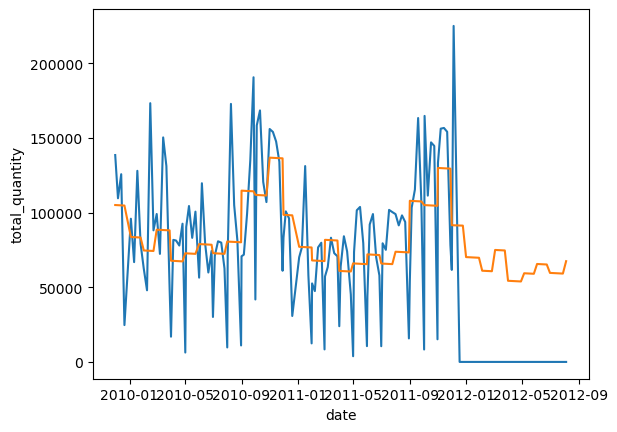

In [39]:
sns.lineplot(data = df, x = df['date'], y = df['total_quantity'])
sns.lineplot(data = df, x = df['date'], y = df['prediction'])